# Manifold learning with t-SNE

t-SNE is used for computing a new representation of training data.

The idea behind t-SNE is to find a two-dimensional representation of the data that preserves the distances between points as best as possible. It tries to preserve the information indicating which points are neighbors to each other. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

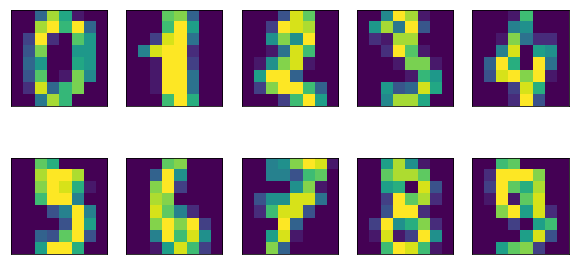

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10,5), 
                        subplot_kw={'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E" ]

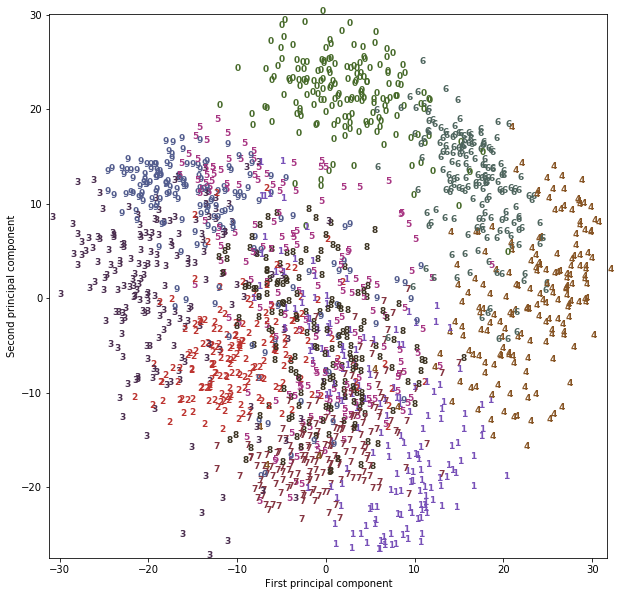

In [19]:
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
             color=colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [20]:
from sklearn.manifold import TSNE

In [22]:
tnse = TSNE(random_state=42)
#use fit_transform instead of fit as TNSE has no transform method.
digits_tsne = tnse.fit_transform(digits.data)

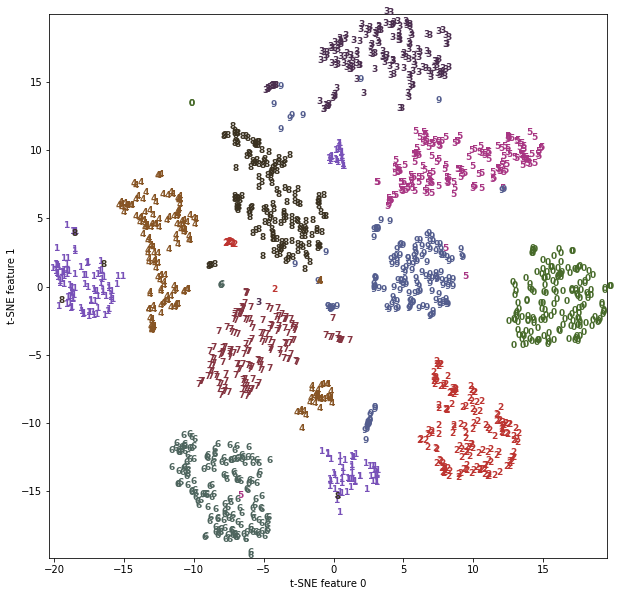

In [23]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:,0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:,1].max())

for i in range(len(digits.data)):
        plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
             color=colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})
        
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")


As compared to the first two components of the PCA, t-SNE does a better job of clustering the digits.